In [1]:
%cd ~/Downloads/

/home/pysolver33/Downloads


In [2]:
%ll

total 11878720
-rw-r--r-- 1 pysolver33    2793670 Jan 28 18:20  20200716_192149.jpg
-rw-r--r-- 1 pysolver33     302525 Jan 28 17:48  2020___Tony.pdf
-rw-r--r-- 1 pysolver33       2313 Feb  1 17:54  audiolabeler-80433a9fbba4.json
-rw-r--r-- 1 pysolver33     397970 Jan 28 18:01  CS50x.pdf
-rw-r--r-- 1 pysolver33     917757 Jan 20 18:57  DataStructuresNOTES.pdf
drwxr-xr-x 2 pysolver33       4096 Feb  2 14:13  glove.twitter/
-rw-r--r-- 1 pysolver33 1520408563 Feb  1 18:56  glove.twitter.27B.zip
-rw-r--r-- 1 pysolver33   72800524 Feb  1 16:59  google-chrome-stable_current_amd64.deb
-rw-r--r-- 1 pysolver33 3644258522 Feb  3 20:07  GoogleNews-vectors-negative300.bin
drwxr-xr-x 2 pysolver33       4096 Nov 24  2018  multi_cased_L-12_H-768_A-12/
-rw-r--r-- 1 pysolver33  662903077 Feb  1 19:28  multi_cased_L-12_H-768_A-12.zip
-rw-r--r-- 1 pysolver33    1293278 Feb  5 12:29  NTHU_Fall2021_UndergradauteGuideline.pdf
-rw-r--r-- 1 pysolver33       7966 Jan 28 17:50 'ray_reference .doc.docx'
-rw-r--r-

# Objective 
- find relationships in recent years * more important
- mark down relevant feature to popularity score
- feature selection 
- model relation between features and target
    - features being song characteristics
    - independant variable being popularity score
    
## Feature definition

#### Normalized data
- Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
- Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
- Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
- Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
- Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
- Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
- Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.
(In Spotify's API is something called Valence, 
that describes the musical positiveness conveyed by a track. 
Tracks with high valence sound more positive 
(happy, cheerful, euphoric),
while tracks with low valence sound more negative (sad, depressed, angry).)

#### Non normalized data
- temp: beats per minute
- explicit: binary to have profanity or not
- duration_ms: miliseconds of song
- mode: binary between major 1, minor 0
- The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


- can delete id,artists,name, key (as have already been grouped and sorted)

## Hypothesis
- look at all the normalized data, find correlation, and map/weight normalized data to regression model
- recency bias has large relevance to popularity score


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Spotify Song Data (Full).csv")

## Understanding basic values and elements of given data set

In [5]:
df.head()
# first first rows preview

,id,artists,name,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
0,4BJqT0PrAfrxzMOxytFOIz,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921,0.0594,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,0.0366,80.954,4
1,7xPhfUan2yNtyFG0cUWkt8,['Dennis Day'],Clancy Lowered the Boom,1921,0.9630,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,0.4150,60.936,5
2,1o6I8BglA6ylDMrIELygv1,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,1921,0.0394,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,0.0339,110.339,5
3,3ftBPsC5vPBKxYSee08FDH,['Frank Parker'],Danny Boy,1921,0.1650,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,0.0354,100.109,3
4,4d6HGyGT8e121BsdKmw9v6,['Phil Regan'],When Irish Eyes Are Smiling,1921,0.2530,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,0.0380,101.665,2


In [6]:
df.tail()

,id,artists,name,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
170648,0KkIkfsLEJbrcIhYsCL7L5,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China,2020,0.608,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,0.0881,105.029,72
170649,0OStKKAuXlxA0fMH54Qs6E,['Ashnikko'],Halloweenie III: Seven Days,2020,0.734,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,0.0605,137.936,68
170650,4BZXVFYCb76Q0Klojq4piV,['MAMAMOO'],AYA,2020,0.637,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,0.0809,91.688,76
170651,5SiZJoLXp3WOl3J4C8IK0d,['Eminem'],Darkness,2020,0.195,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,0.3080,75.055,70
170652,7HmnJHfs0BkFzX4x8j0hkl,"['KEVVO', 'J Balvin']",Billetes Azules (with J Balvin),2020,0.642,0.13200,0.856,189507,0.721,1,0.004710,7,0.1820,-4.928,1,0.1080,94.991,74


In [7]:
df.artists = df.artists.str.replace("[","")
df.artists = df.artists.str.replace("]","")
df.artists = df.artists.str.replace("'","")
df.artists

0         Sergei Rachmaninoff, James Levine, Berliner Ph...
1                                                Dennis Day
2         KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3                                              Frank Parker
4                                                Phil Regan
                                ...                        
170648     Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin
170649                                             Ashnikko
170650                                              MAMAMOO
170651                                               Eminem
170652                                      KEVVO, J Balvin
Name: artists, Length: 170653, dtype: object

In [8]:
df.id.sort_values()

66784     000G1xMMuwxNHmwVsBdtj1
138440    000GyYHG4uWmlXieKLij8u
61760     000Npgk5e2SgwGaIsN3ztv
111779    000ZxLGm7jDlWCHtcXSeBe
111780    000jBcNljWTnyjB4YO7ojf
                   ...          
107591    7zyqJJ0QwajaHaPLCqZFXN
105542    7zywdG4ysfC5XNBzjQAo2o
62798     7zzbPkvxJ6iANIxcSz60rm
29067     7zzbfi8fvHe6hm342GcNYl
29083     7zzuPsjj9L3M7ikqGmjN0D
Name: id, Length: 170653, dtype: object

In [9]:
df[['id','artists','name','year','key']]

,id,artists,name,year,key
0,4BJqT0PrAfrxzMOxytFOIz,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921,10
1,7xPhfUan2yNtyFG0cUWkt8,Dennis Day,Clancy Lowered the Boom,1921,7
2,1o6I8BglA6ylDMrIELygv1,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,1921,3
3,3ftBPsC5vPBKxYSee08FDH,Frank Parker,Danny Boy,1921,5
4,4d6HGyGT8e121BsdKmw9v6,Phil Regan,When Irish Eyes Are Smiling,1921,3
...,...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",China,2020,7
170649,0OStKKAuXlxA0fMH54Qs6E,Ashnikko,Halloweenie III: Seven Days,2020,7
170650,4BZXVFYCb76Q0Klojq4piV,MAMAMOO,AYA,2020,4
170651,5SiZJoLXp3WOl3J4C8IK0d,Eminem,Darkness,2020,2


In [10]:
df.columns # feature labels

Index(['id', 'artists', 'name', 'year', 'valence', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'popularity'],
      dtype='object')

rows of columns seems already sorted by year, thus id, artists, keys would in all likelihood be irrelevant to our analysis

In [11]:
cols_interest = [col for idx,col in enumerate(df.columns) if col not in ['id','artists','name','key']]
df = df[cols_interest]
df.head(10)

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,popularity
0,1921,0.0594,0.982,0.279,831667,0.211,0,0.878000,0.665,-20.096,1,0.0366,80.954,4
1,1921,0.9630,0.732,0.819,180533,0.341,0,0.000000,0.160,-12.441,1,0.4150,60.936,5
2,1921,0.0394,0.961,0.328,500062,0.166,0,0.913000,0.101,-14.850,1,0.0339,110.339,5
3,1921,0.1650,0.967,0.275,210000,0.309,0,0.000028,0.381,-9.316,1,0.0354,100.109,3
4,1921,0.2530,0.957,0.418,166693,0.193,0,0.000002,0.229,-10.096,1,0.0380,101.665,2
5,1921,0.1960,0.579,0.697,395076,0.346,0,0.168000,0.130,-12.506,1,0.0700,119.824,6
6,1921,0.4060,0.996,0.518,159507,0.203,0,0.000000,0.115,-10.589,1,0.0615,66.221,4
7,1921,0.0731,0.993,0.389,218773,0.088,0,0.527000,0.363,-21.091,0,0.0456,92.867,2
8,1921,0.7210,0.996,0.485,161520,0.130,0,0.151000,0.104,-21.508,0,0.0483,64.678,0
9,1921,0.7710,0.982,0.684,196560,0.257,0,0.000000,0.504,-16.415,1,0.3990,109.378,0


In [12]:
df.describe()

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,popularity
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,1976.787241,0.528587,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,0.205839,-11.467990,0.706902,0.098393,116.861590,31.431794
std,25.917853,0.263171,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,0.174805,5.697943,0.455184,0.162740,30.708533,21.826615
min,1921.000000,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.317000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,0.098800,-14.615000,0.000000,0.034900,93.421000,11.000000
50%,1977.000000,0.540000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,0.136000,-10.580000,1.000000,0.045000,114.729000,33.000000
75%,1999.000000,0.747000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,0.261000,-7.183000,1.000000,0.075600,135.537000,48.000000
max,2020.000000,1.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,1.000000,3.855000,1.000000,0.970000,243.507000,100.000000


In [13]:
df.corr()

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,popularity
year,1.000000,-0.028245,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,-0.057318,0.487697,-0.032385,-0.167816,0.141048,0.862442
valence,-0.028245,1.000000,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.003832,0.313512,0.015641,0.046381,0.171689,0.014200
acousticness,-0.614250,-0.184101,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.024482,-0.561696,0.047168,-0.043980,-0.207120,-0.573162
danceability,0.188515,0.558946,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,-0.100193,0.285057,-0.045956,0.235491,0.001801,0.199606
duration_ms,0.079713,-0.191813,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,0.047168,-0.003037,-0.046085,-0.084604,-0.025472,0.059597
energy,0.530272,0.353876,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.126192,0.782362,-0.039260,-0.070555,0.250865,0.485005
explicit,0.220881,-0.018613,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.039640,0.140300,-0.078872,0.414070,0.011969,0.191543
instrumentalness,-0.272371,-0.198501,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.047193,-0.408611,-0.036543,-0.121700,-0.105361,-0.296750
liveness,-0.057318,0.003832,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,1.000000,0.056422,0.002641,0.134667,0.007714,-0.076464
loudness,0.487697,0.313512,-0.561696,0.285057,-0.003037,0.782362,0.140300,-0.408611,0.056422,1.000000,-0.010727,-0.139296,0.209774,0.457051


## Utilize visualization techniques for better intuition of data

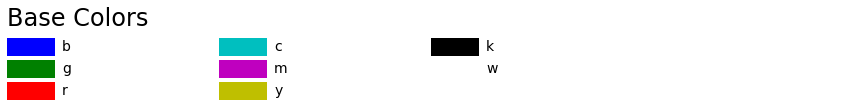

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
# plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
#                 sort_colors=False, emptycols=2)

#sphinx_gallery_thumbnail_number = 3
# plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
#xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("XKCD_Colors.png")

plt.show()


<AxesSubplot:>

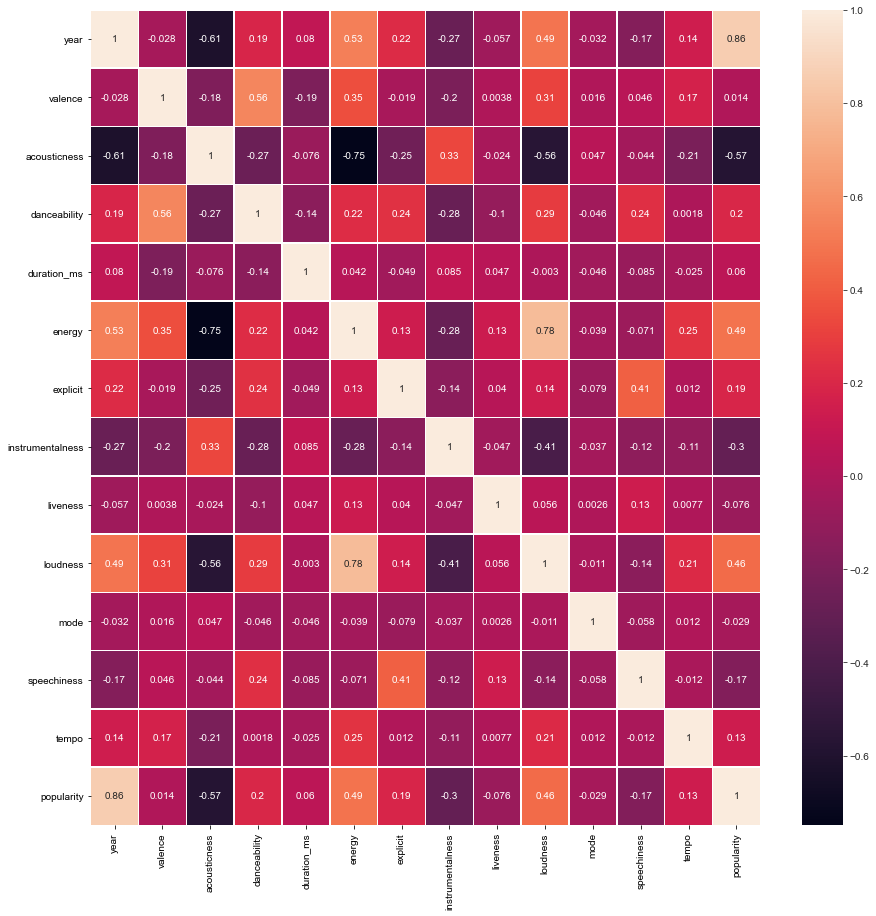

In [15]:
fig,ax = plt.subplots(figsize=(15,15))
custom_style = {
    'axes.axisbelow': True,
    'axes.edgecolor': 'white',
    'axes.facecolor': '#EAEAF2',
    'axes.grid': True,
    'axes.labelcolor': '.15',
    'axes.linewidth': 0,
    'font.family': 'Arial',
    'grid.color': 'white',
    'grid.linestyle': '-',
    'image.cmap': 'Greys',
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'lines.solid_capstyle': 'round',
    'pdf.fonttype': 42,
    'text.color': '.15',
    'xtick.color': '.15',
    'xtick.direction': 'out',
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.color': '.15',
    'ytick.direction': 'out',
    'ytick.major.size': 0,
    'ytick.minor.size': 0
}
sns.set_style("darkgrid", rc=custom_style)
sns.heatmap(df.corr(),
           xticklabels=df.columns,
           yticklabels=df.columns,
           annot=True,
           linewidths=0.5,)

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='valence', ylabel='year'>,
        <AxesSubplot:xlabel='acousticness', ylabel='year'>,
        <AxesSubplot:xlabel='danceability', ylabel='year'>,
        <AxesSubplot:xlabel='duration_ms', ylabel='year'>,
        <AxesSubplot:xlabel='energy', ylabel='year'>,
        <AxesSubplot:xlabel='explicit', ylabel='year'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='year'>,
        <AxesSubplot:xlabel='liveness', ylabel='year'>,
        <AxesSubplot:xlabel='loudness', ylabel='year'>,
        <AxesSubplot:xlabel='mode', ylabel='year'>,
        <AxesSubplot:xlabel='speechiness', ylabel='year'>,
        <AxesSubplot:xlabel='tempo', ylabel='year'>,
        <AxesSubplot:xlabel='popularity', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='valence'>,
        <AxesSubplot:xlabel='valence', ylabel='valence'>,
        <AxesSubplot:xlabel='acousticness', ylabel='valence'>,
        <AxesSubplot:xlabel='

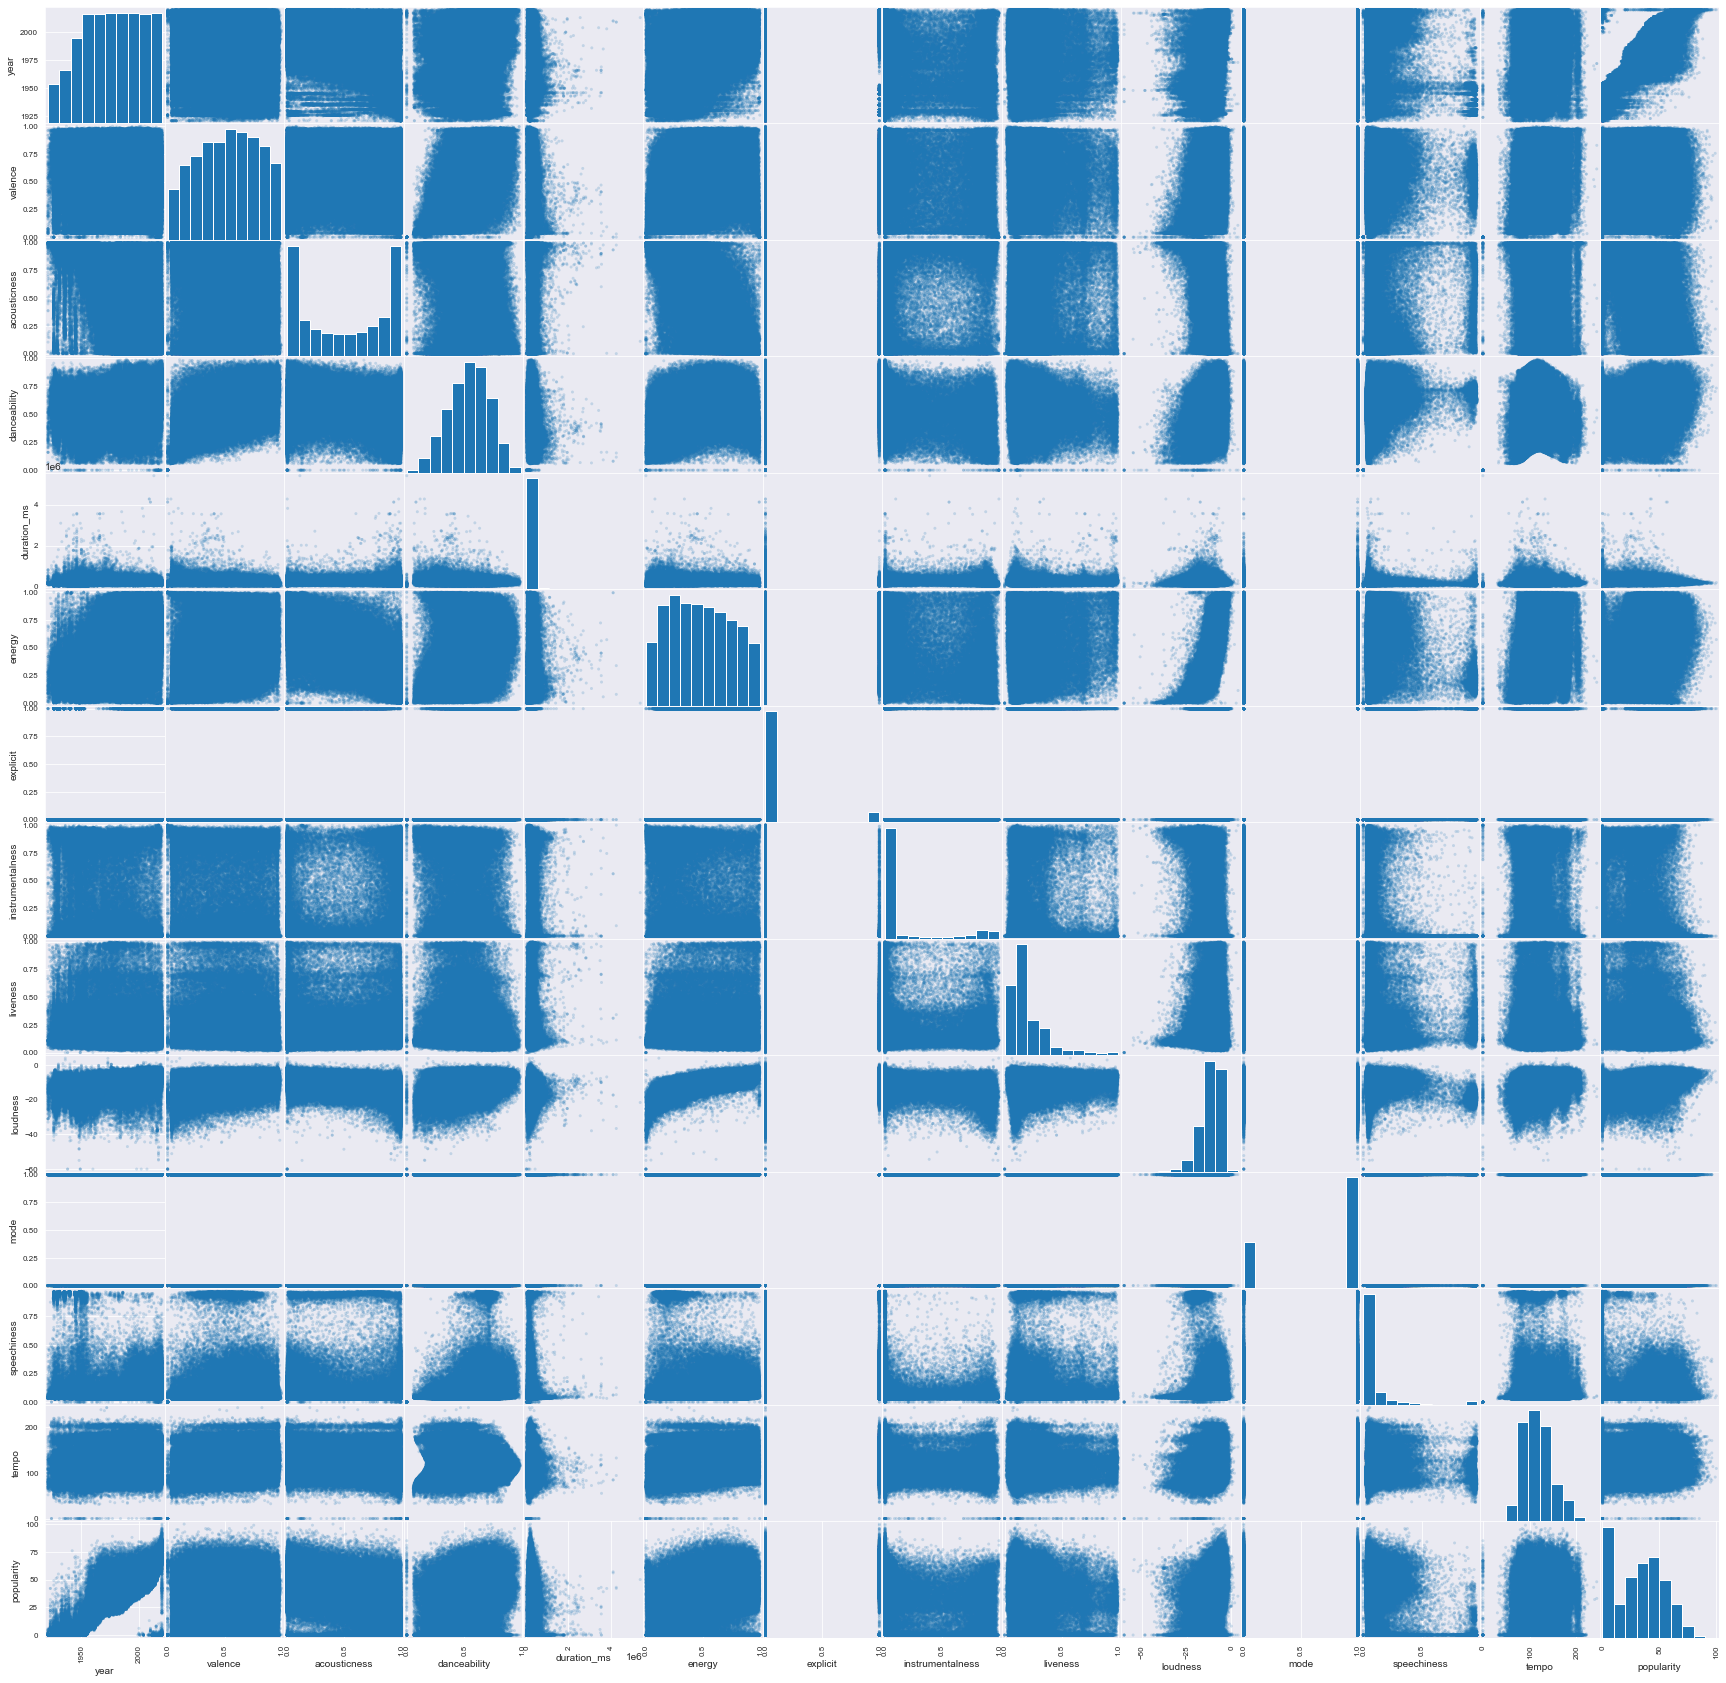

In [16]:
# from hvplot import scatter_matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2,figsize=(30,30))

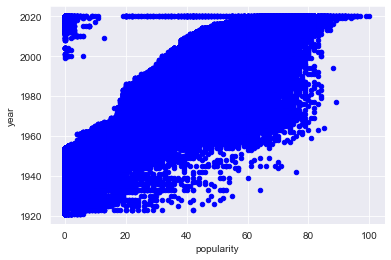

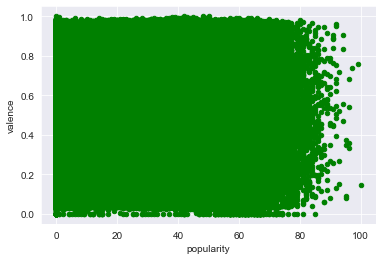

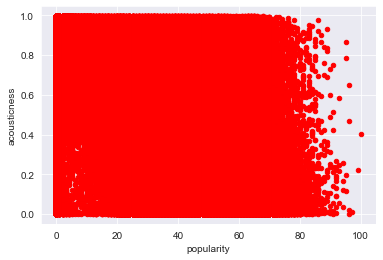

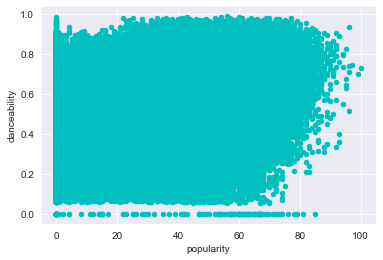

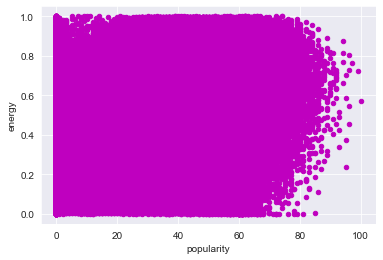

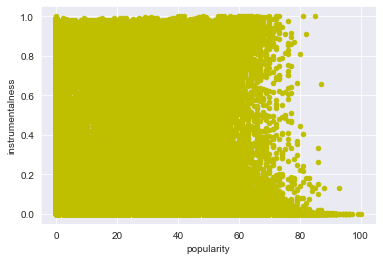

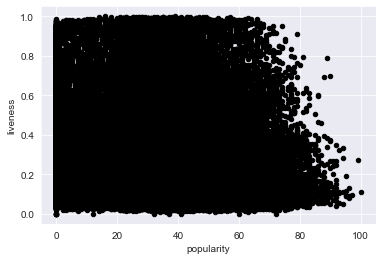

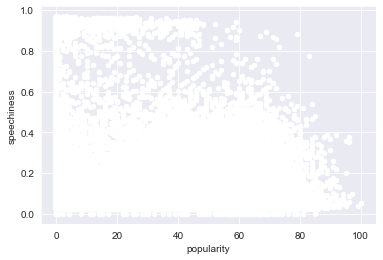

In [17]:
for col,color in zip(df.drop(columns=['tempo','mode','explicit','duration_ms','loudness','popularity']).columns,mcolors.BASE_COLORS):
    ax = df.plot(kind="scatter",y=col,x='popularity',color=color)

## Explore all feature labels that are not normalized first

## find all inversingly correlated columns that explain the scale of feature label deviation

In [37]:
def calc_correlations(df, cutoff=0.5):
    corr = df.corr()
    corr_data = corr[(corr > cutoff)]
    corr_list = df.corr().unstack().sort_values(kind="quicksort",ascending=False)
    return corr_list.where(corr_list < 1.0),corr_data

corr_list,corr_data = calc_correlations(df.drop(columns=['tempo','mode','explicit','duration_ms','loudness','popularity']))
corr_list = corr_list[np.isfinite(corr_list)].drop_duplicates()

In [38]:
corr_list


valence           danceability        0.558946
year              energy              0.530272
valence           energy              0.353876
instrumentalness  acousticness        0.329819
speechiness       danceability        0.235491
energy            danceability        0.221967
year              danceability        0.188515
liveness          speechiness         0.134667
                  energy              0.126192
valence           speechiness         0.046381
liveness          valence             0.003832
acousticness      liveness           -0.024482
year              valence            -0.028245
acousticness      speechiness        -0.043980
liveness          instrumentalness   -0.047193
year              liveness           -0.057318
energy            speechiness        -0.070555
liveness          danceability       -0.100193
instrumentalness  speechiness        -0.121700
speechiness       year               -0.167816
valence           acousticness       -0.184101
instrumentaln

In [20]:
corr_data

,year,valence,acousticness,danceability,energy,instrumentalness,liveness,speechiness
year,NaN,NaN,NaN,NaN,0.530272,NaN,NaN,NaN
valence,NaN,NaN,NaN,0.558946,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,0.558946,NaN,NaN,NaN,NaN,NaN,NaN
energy,0.530272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,popularity
0,1921,0.0594,0.98200,0.279,831667,0.211,0,0.878000,0.6650,-20.096,1,0.0366,80.954,4
1,1921,0.9630,0.73200,0.819,180533,0.341,0,0.000000,0.1600,-12.441,1,0.4150,60.936,5
2,1921,0.0394,0.96100,0.328,500062,0.166,0,0.913000,0.1010,-14.850,1,0.0339,110.339,5
3,1921,0.1650,0.96700,0.275,210000,0.309,0,0.000028,0.3810,-9.316,1,0.0354,100.109,3
4,1921,0.2530,0.95700,0.418,166693,0.193,0,0.000002,0.2290,-10.096,1,0.0380,101.665,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020,0.6080,0.08460,0.786,301714,0.808,0,0.000289,0.0822,-3.702,1,0.0881,105.029,72
170649,2020,0.7340,0.20600,0.717,150654,0.753,0,0.000000,0.1010,-6.020,1,0.0605,137.936,68
170650,2020,0.6370,0.10100,0.634,211280,0.858,0,0.000009,0.2580,-2.226,0,0.0809,91.688,76
170651,2020,0.1950,0.00998,0.671,337147,0.623,1,0.000008,0.6430,-7.161,1,0.3080,75.055,70


## Only do 2020

In [22]:
df.loc[df.year == 2020,:]

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,popularity
19606,2020,0.756,0.22100,0.700,140526,0.722,1,0.000000,0.2720,-3.558,0,0.0369,90.989,99
19607,2020,0.347,0.11400,0.823,190476,0.586,1,0.000000,0.1930,-6.606,0,0.2000,125.971,95
19608,2020,0.357,0.01940,0.935,187541,0.454,1,0.000000,0.0824,-7.509,1,0.3750,133.073,96
19609,2020,0.522,0.24400,0.761,261493,0.518,1,0.000035,0.1070,-8.871,1,0.1340,133.976,93
19610,2020,0.682,0.46800,0.737,172325,0.802,1,0.000000,0.0931,-4.771,1,0.0878,144.015,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020,0.608,0.08460,0.786,301714,0.808,0,0.000289,0.0822,-3.702,1,0.0881,105.029,72
170649,2020,0.734,0.20600,0.717,150654,0.753,0,0.000000,0.1010,-6.020,1,0.0605,137.936,68
170650,2020,0.637,0.10100,0.634,211280,0.858,0,0.000009,0.2580,-2.226,0,0.0809,91.688,76
170651,2020,0.195,0.00998,0.671,337147,0.623,1,0.000008,0.6430,-7.161,1,0.3080,75.055,70


In [23]:
df.loc[df.year != 2020,:]

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,popularity
0,1921,0.0594,0.982000,0.279,831667,0.211,0,0.878000,0.665,-20.096,1,0.0366,80.954,4
1,1921,0.9630,0.732000,0.819,180533,0.341,0,0.000000,0.160,-12.441,1,0.4150,60.936,5
2,1921,0.0394,0.961000,0.328,500062,0.166,0,0.913000,0.101,-14.850,1,0.0339,110.339,5
3,1921,0.1650,0.967000,0.275,210000,0.309,0,0.000028,0.381,-9.316,1,0.0354,100.109,3
4,1921,0.2530,0.957000,0.418,166693,0.193,0,0.000002,0.229,-10.096,1,0.0380,101.665,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170448,2019,0.7040,0.226000,0.757,159547,0.688,0,0.000000,0.237,-4.546,1,0.1120,155.994,71
170449,2019,0.2230,0.001210,0.449,247613,0.825,0,0.000000,0.208,-5.177,1,0.0370,135.934,60
170450,2019,0.2330,0.016700,0.616,203555,0.469,0,0.000000,0.111,-7.380,1,0.0270,135.035,63
170451,2019,0.4940,0.000755,0.766,196875,0.649,0,0.545000,0.137,-13.051,1,0.0958,127.996,59


Only doing 2020 ommits 90% of given data and is biased as such 

## heuristic of correlated pairs and then weight them by difference to popularity 

In [24]:
df.loudness # may be related to decibal level

0        -20.096
1        -12.441
2        -14.850
3         -9.316
4        -10.096
           ...  
170648    -3.702
170649    -6.020
170650    -2.226
170651    -7.161
170652    -4.928
Name: loudness, Length: 170653, dtype: float64

In [25]:
df.loudness.describe()

count    170653.000000
mean        -11.467990
std           5.697943
min         -60.000000
25%         -14.615000
50%         -10.580000
75%          -7.183000
max           3.855000
Name: loudness, dtype: float64